## Preparation

In [68]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import zipfile
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow

In [69]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Train Data


In [70]:
# train_data = '/content/drive/MyDrive/vgg16/train'

# train_data_bike = os.listdir(train_data + '/Bike/')
# train_data_car = os.listdir(train_data + '/Car/')

In [71]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/vgg16/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/vgg16/train/Bike/Bike (1).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (106).jpg
/content/drive/MyDrive/vgg16/train/Bike/Bike (11).jpg
/content/drive/MyDrive/vgg16/train/Bike/Bike (112).jpg
/content/drive/MyDrive/vgg16/train/Bike/Bike (12).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (10).png
/content/drive/MyDrive/vgg16/train/Bike/Bike (104).jpg
/content/drive/MyDrive/vgg16/train/Bike/Bike (11).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (116).jpg
/content/drive/MyDrive/vgg16/train/Bike/Bike (104).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (107).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (12).png
/content/drive/MyDrive/vgg16/train/Bike/Bike (115).jpg
/content/drive/MyDrive/vgg16/train/Bike/Bike (10).jpg
/content/drive/MyDrive/vgg16/train/Bike/Bike (110).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (119).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (10).jpeg
/content/drive/MyDrive/vgg16/train/Bike/Bike (102).jpg
/content/dr

In [72]:
train_data='/content/drive/MyDrive/vgg16/train'

train_name=sorted(os.listdir(train_data))
train_name

['Bike', 'Car']

In [73]:
n_classes = len(train_name)
print(f"Total Number of Classes : {n_classes}")

Total Number of Classes : 2


In [74]:
class_dis = [len(os.listdir(os.path.join(train_data, name))) for name in train_name]
class_dis

[457, 322]

In [75]:
import plotly.express as px
fig = px.pie(names=train_name, values=class_dis)
fig.update_layout({'title':{
    'text':'Train Class Distribution',
    'x':0.5
}})
fig.show()

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True, 
    rotation_range=20,
    validation_split=0.2
)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


train_data = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224), # image hope
    batch_size=32,
    class_mode='binary'
)

Found 779 images belonging to 2 classes.


In [77]:
labels = (train_data.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'Bike', 1: 'Car'}


In [78]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



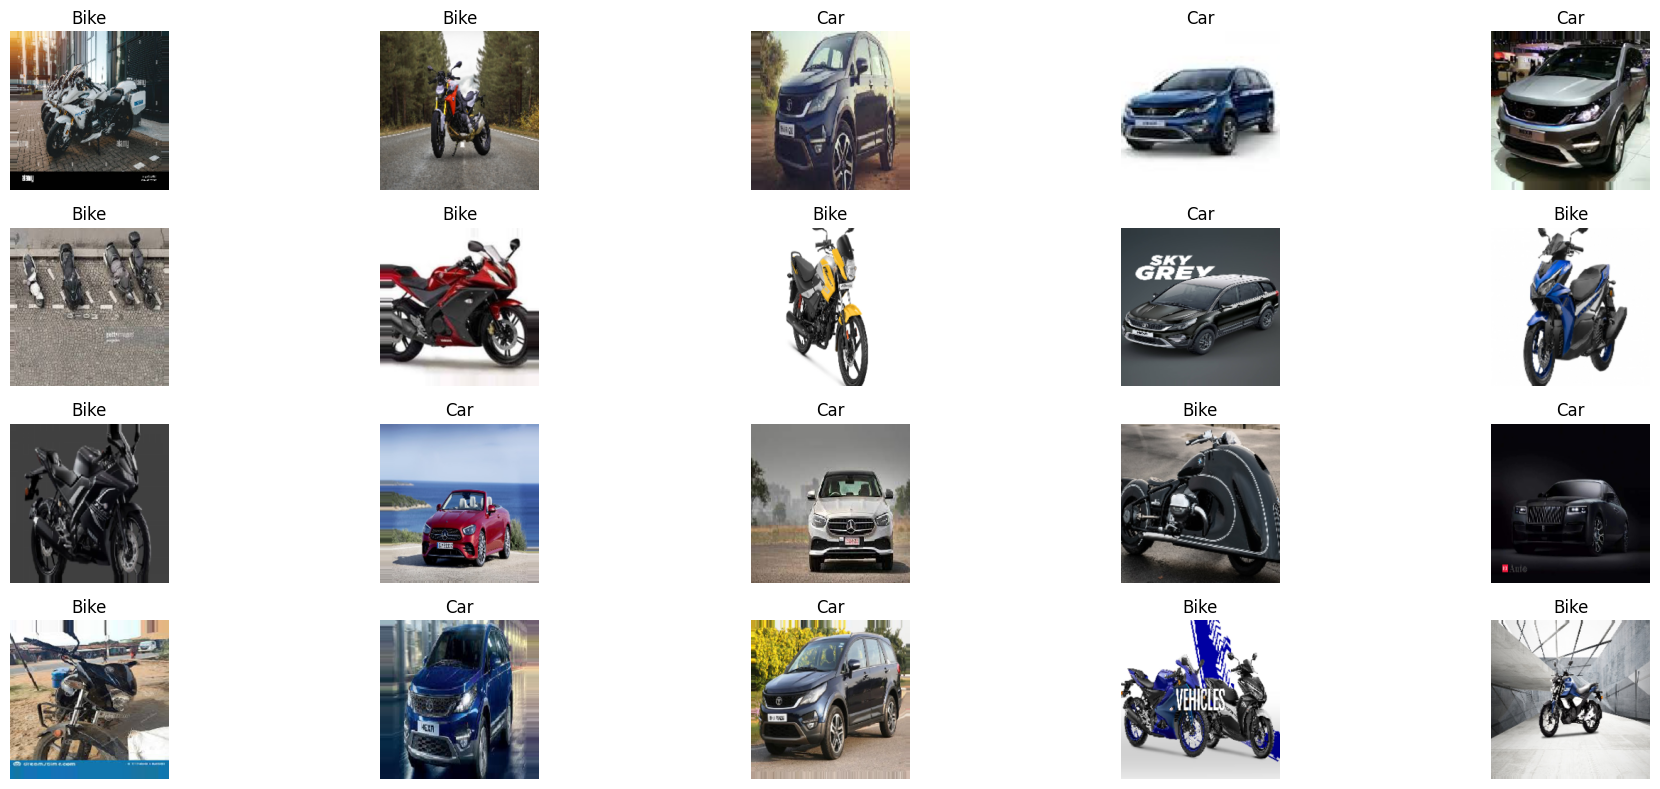

In [79]:
i=1
plt.figure(figsize=(20,8))
for images, labels in train_data:
    index = np.random.randint(len(images))
    image, label = images[index], labels[index]

    plt.subplot(4,5, i)
    show_image(image, title=f"{train_name[int(label)]}")
    i+=1
    if i>=21: break

plt.tight_layout()
plt.show()

## Test Data

In [80]:
test_data='/content/drive/MyDrive/vgg16/test'

test_name=sorted(os.listdir(test_data))
test_name

['Bike', 'Car']

In [81]:
test_dis = [len(os.listdir(os.path.join(test_data, name))) for name in test_name]
test_dis

[23, 20]

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True, 
    rotation_range=20,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

Found 43 images belonging to 2 classes.


In [83]:
import plotly.express as px
fig = px.pie(names=test_name, values=test_dis)
fig.update_layout({'title':{
    'text':'Test Class Distribution',
    'x':0.5
}})
fig.show()

In [84]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

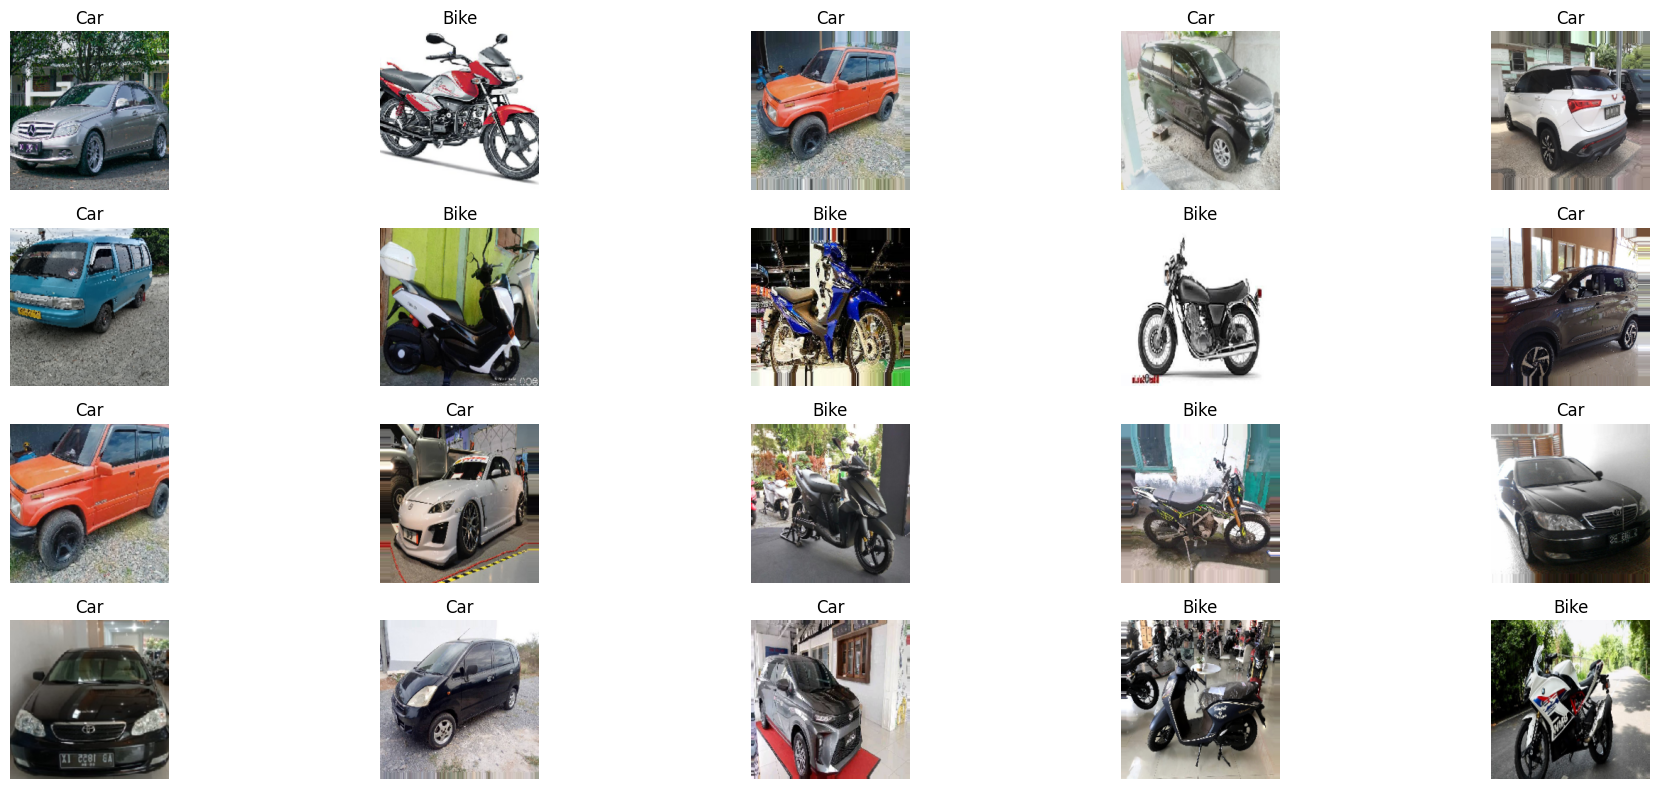

In [85]:
i=1
plt.figure(figsize=(20,8))
for images, labels in test_data:
    index = np.random.randint(len(images))
    image, label = images[index], labels[index]

    plt.subplot(4,5, i)
    show_image(image, title=f"{test_name[int(label)]}")
    i+=1
    if i>=21: break

plt.tight_layout()
plt.show()

## Build Vgg16 Model

In [86]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [87]:
# Define the model architecture
model = Sequential()

In [88]:
# Blok konvolusi pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Konversi matriks fitur menjadi vektor
model.add(Flatten())

# Fully connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Input layer: This layer specifies the input shape of the image, which is (224, 224, 3) for VGG16 since it was trained on the ImageNet dataset, which contains RGB images of this size. The input shape is specified in the first convolutional layer.

Convolutional layer 1: This layer applies 64 filters with a kernel size of 3x3 to the input image, followed by ReLU activation. The padding is set to 'same' to ensure that the output feature maps have the same spatial dimensions as the input.

Convolutional layer 2: This layer applies another 64 filters with a kernel size of 3x3, followed by ReLU activation.

Max pooling layer 1: This layer applies max pooling with a pool size of 2x2 and a stride of 2 to reduce the spatial dimensions of the feature maps by half.

Convolutional layer 3: This layer applies 128 filters with a kernel size of 3x3, followed by ReLU activation.

Convolutional layer 4: This layer applies another 128 filters with a kernel size of 3x3, followed by ReLU activation.

Max pooling layer 2: This layer applies max pooling with a pool size of 2x2 and a stride of 2.

Convolutional layer 5: This layer applies 256 filters with a kernel size of 3x3, followed by ReLU activation.

Convolutional layer 6: This layer applies another 256 filters with a kernel size of 3x3, followed by ReLU activation.

Convolutional layer 7: This layer applies another 256 filters with a kernel size of 3x3, followed by ReLU activation.

Max pooling layer 3: This layer applies max pooling with a pool size of 2x2 and a stride of 2.

Convolutional layer 8: This layer applies 512 filters with a kernel size of 3x3, followed by ReLU activation.

Convolutional layer 9: This layer applies another 512 filters with a kernel size of 3x3, followed by ReLU activation.

Convolutional layer 10: This layer applies another 512 filters with a kernel size of 3x3, followed by ReLU activation.

Max pooling layer 4: This layer applies max pooling with a pool size of 2x2 and a stride of 2.

Convolutional layer 11: This layer applies 512 filters with a kernel size of 3x3, followed by ReLU activation.

Convolutional layer 12: This layer applies another 512 filters with a kernel size of 3x3, followed by ReLU activation.

Convolutional layer 13: This layer applies another 512 filters with a kernel size of 3x3, followed by ReLU activation.

Max pooling layer 5: This layer applies max pooling with a pool size of 2x2 and a stride of 2.

Fully connected layer 1: This layer has 4096 units with ReLU activation.

Fully connected layer 2: This layer has another 4096 units with ReLU activation.

Output layer: This layer has 1000 units with softmax activation, corresponding to the 1000 classes in the ImageNet dataset.

Each convolutional layer learns to extract certain features from the input image, while the max pooling layers downsample the feature maps to reduce the spatial dimensions. The fully connected layers at the end of the network combine the extracted features into a high-level representation that can be used for classification. The Flatten() layer reshapes the output of the last convolutional layer into a one-dimensional vector before passing it to the fully connected layers.

In [89]:
# from tensorflow.keras.optimizers import Adam

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

In [90]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_29 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [92]:
# # Mengompilasi model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [93]:
# history = model.fit(
#     train_data,
#     epochs=101,
#     verbose=1,
#     steps_per_epoch=5,
#     validation_steps=10,
#     validation_data=test_data,
# )
history=model.fit(train_data,epochs=10,validation_data=test_data)
# history = model.fit(
#     train_data,
#     validation_data=test_data,
#     epochs=10,
#     batch_size= 32,
#     shuffle= True)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



25/25 [==============================] - 26s 752ms/step - loss: 0.8297 - accuracy: 0.5571 - val_loss: 0.6910 - val_accuracy: 0.5349
Epoch 2/10
25/25 [==============================] - 19s 773ms/step - loss: 0.6842 - accuracy: 0.5866 - val_loss: 0.6936 - val_accuracy: 0.5349
Epoch 3/10
25/25 [==============================] - 18s 702ms/step - loss: 0.6817 - accuracy: 0.5866 - val_loss: 0.6931 - val_accuracy: 0.5349
Epoch 4/10
25/25 [==============================] - 19s 773ms/step - loss: 0.6797 - accuracy: 0.5866 - val_loss: 0.6930 - val_accuracy: 0.5349
Epoch 5/10
25/25 [==============================] - 19s 769ms/step - loss: 0.6790 - accuracy: 0.5866 - val_loss: 0.6959 - val_accuracy: 0.5349
Epoch 6/10
25/25 [==============================] - 18s 707ms/step - loss: 0.6797 - accuracy: 0.5866 - val_loss: 0.6960 - val_accuracy: 0.5349
Epoch 7/10
25/25 [==============================] - 18s 712ms/step - loss: 0.6786 - accuracy: 0.5866 - val_loss: 0.6967 - val_accuracy: 0.5349
Epoch 8/10

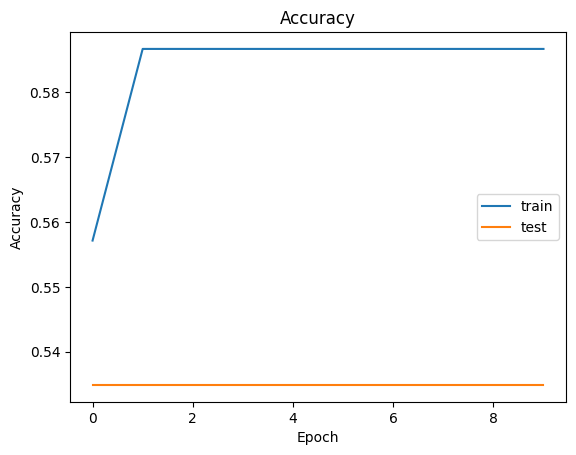

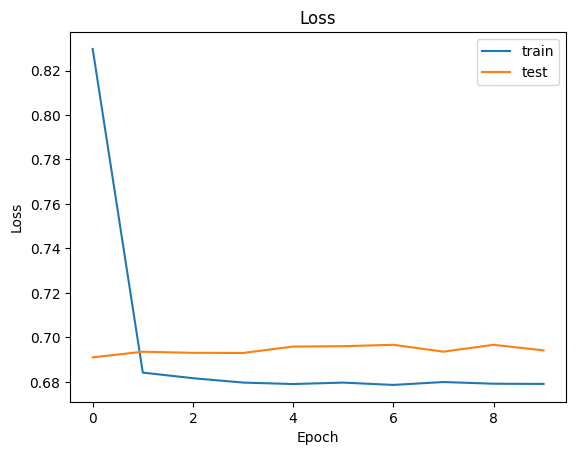

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

In [95]:
# class_name_train = list(train_data.class_indices.keys())
# class_name_train

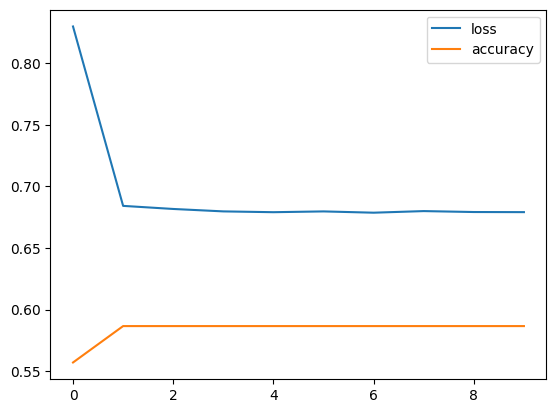

<Figure size 640x480 with 0 Axes>

In [96]:
# Visualisasi Loss dan Akurasi
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
plt.savefig('Loss_Acc')

In [97]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = train_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 1)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


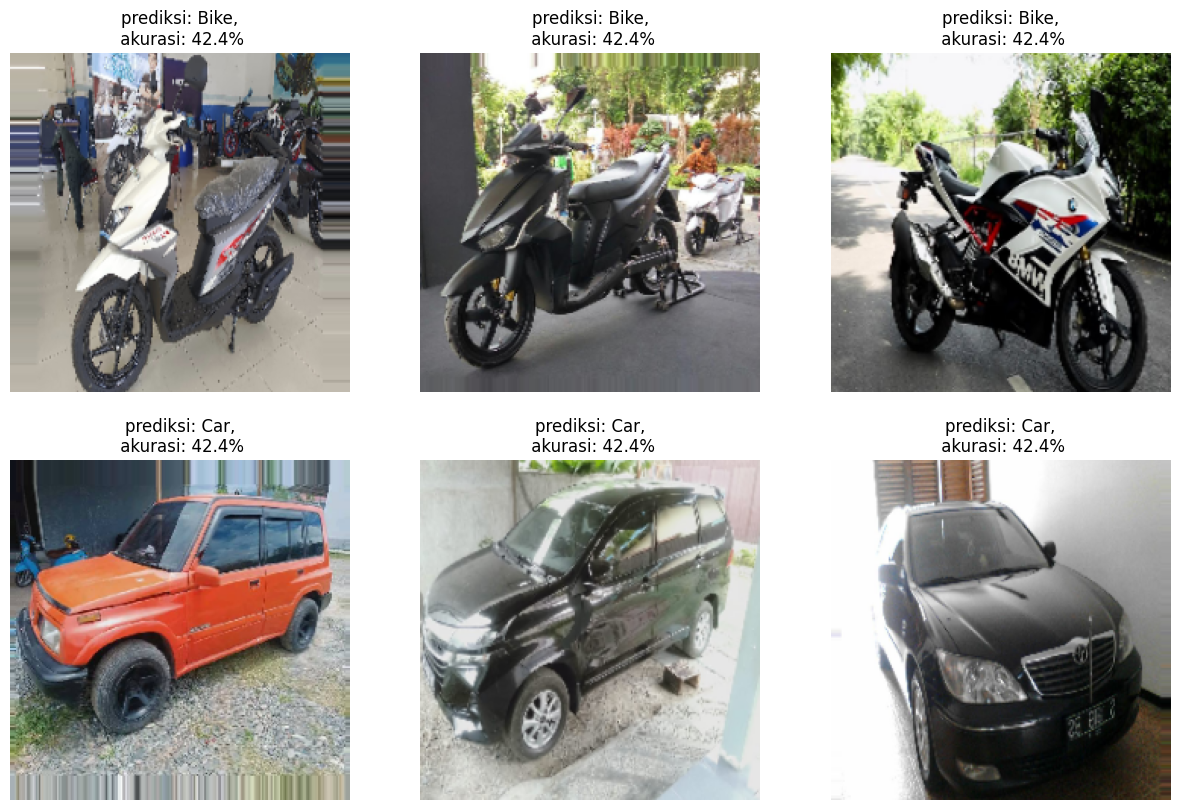

In [98]:
#Menampilkan gambar dan prediksi
import numpy as np

plt.figure(figsize=(15, 15))

for images, labels in test_data:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = train_name[int(labels[i])] 
        plt.title(f"prediksi: {actual_class},\n akurasi: {confidence}%")
        plt.axis("off")
    break

1/1 [==============================] - 0s 21ms/step


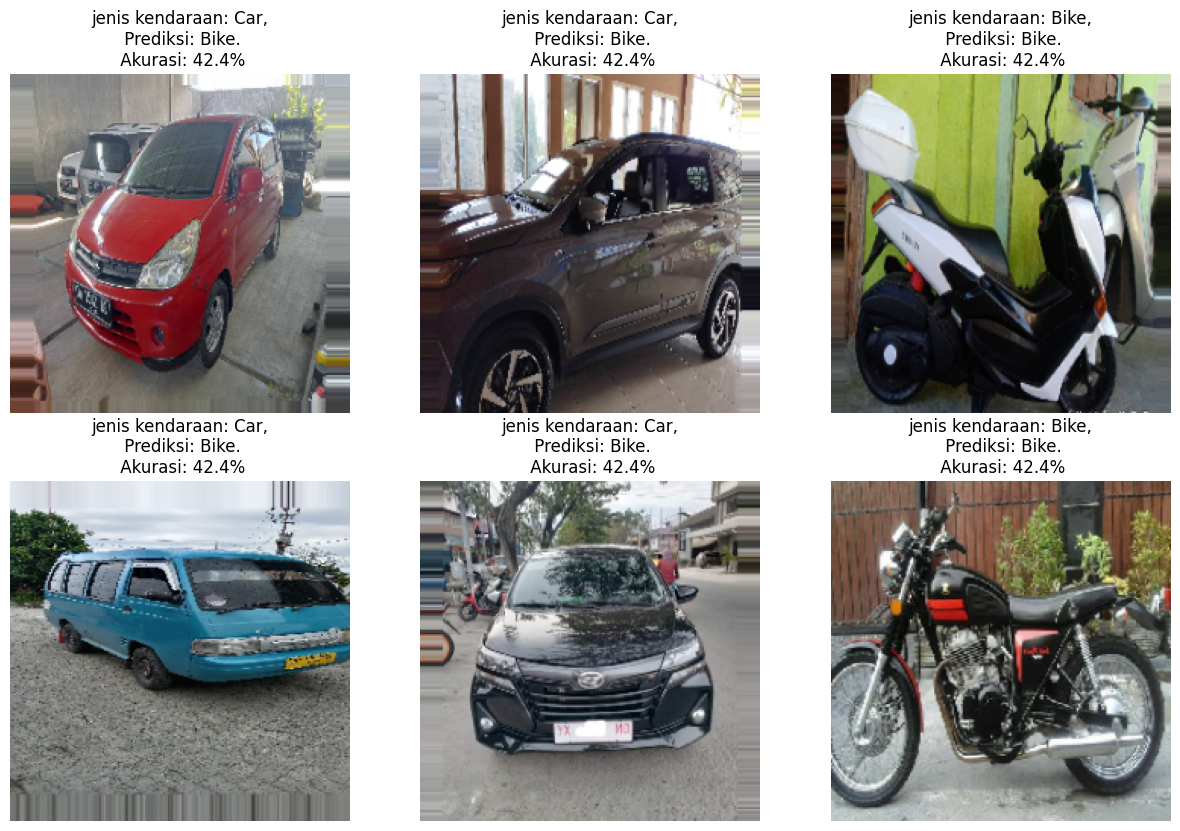

In [99]:
plt.figure(figsize=(15, 15))

for images, labels in test_data:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = train_name[int(labels[i])] 
        plt.title(f"jenis kendaraan: {actual_class},\n Prediksi: {predicted_class}.\n Akurasi: {confidence}%")
        plt.axis("off")
    break

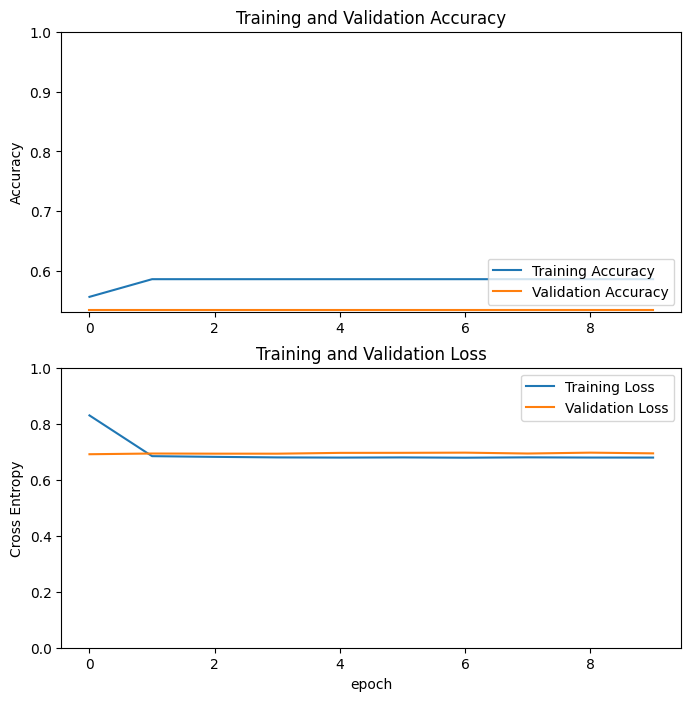

In [100]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()